In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_train = pd.read_csv("Data/train_loan_sale_analytics_vidhya.csv")
df_test = pd.read_csv("Data/test_loan_analytics_vidhya.csv")



In [84]:
df_train.shape

(614, 13)

In [85]:
df_test.shape

(367, 12)

In [86]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Missing Values

In [87]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis  = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


### Filling Missing Value

In [88]:
df_train['Gender'] = df_train['Gender'].fillna(
df_train['Gender'].dropna().mode().values[0] )
df_train['Married'] = df_train['Married'].fillna(
df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna(
df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(
df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(
df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(
df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(
df_train['Credit_History'].dropna().mode().values[0] )


In [89]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis  = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


In [90]:
df_train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

### Data Visualisation

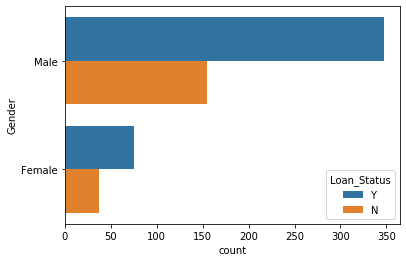

In [91]:
sns.countplot(y = "Gender", hue = "Loan_Status", data = df_train)


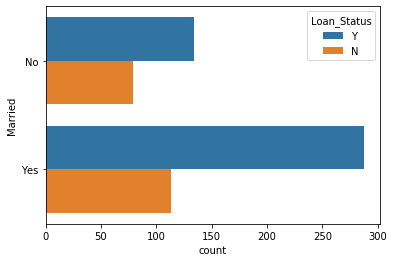

In [92]:
sns.countplot(y= "Married", hue = "Loan_Status", data = df_train)

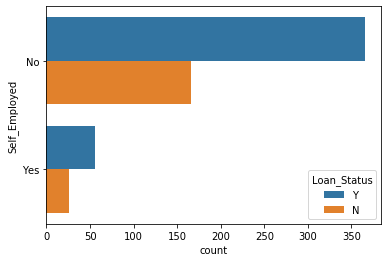

In [93]:
sns.countplot(y= "Self_Employed", hue = "Loan_Status", data = df_train)

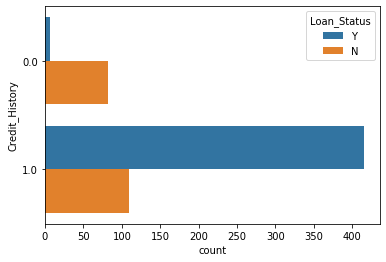

In [94]:
sns.countplot(y= "Credit_History", hue = "Loan_Status", data = df_train)

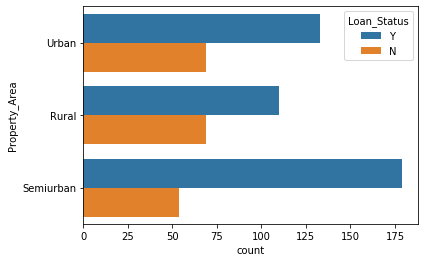

In [95]:
sns.countplot(y= "Property_Area", hue = "Loan_Status", data = df_train)

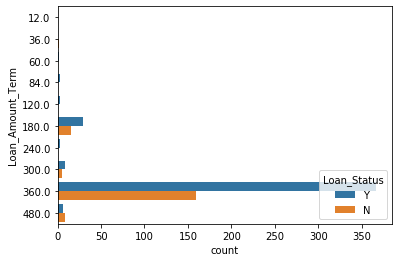

In [96]:
sns.countplot(y= "Loan_Amount_Term", hue = "Loan_Status", data = df_train)

C:\Users\Manish Singh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


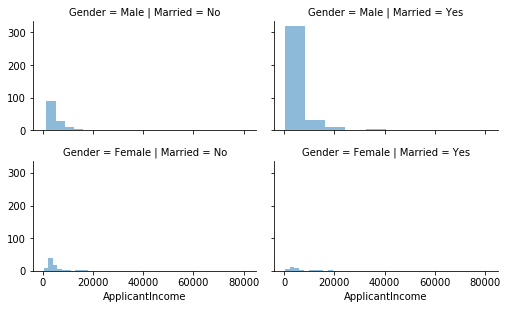

In [97]:
grid = sns.FacetGrid(df_train, row = "Gender",  col = "Married", size = 2.2, aspect=1.6)
grid.map(plt.hist, "ApplicantIncome", alpha = 0.5, bins = 10)
grid.add_legend()

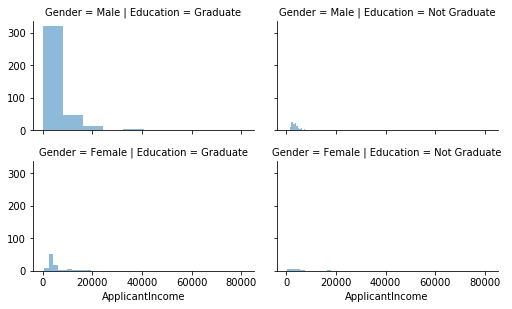

In [98]:
grid = sns.FacetGrid(df_train, row = "Gender",  col = "Education", size = 2.2, aspect=1.6)
grid.map(plt.hist, "ApplicantIncome", alpha = 0.5, bins = 10)
grid.add_legend()

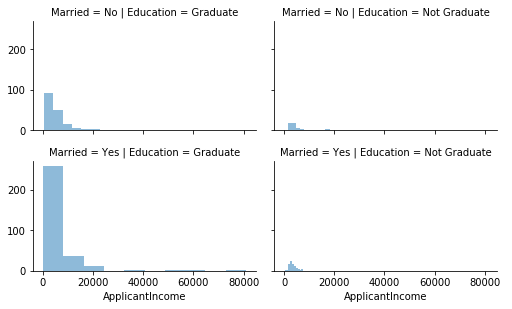

In [99]:
grid = sns.FacetGrid(df_train, row = "Married",  col = "Education", size = 2.2, aspect=1.6)
grid.map(plt.hist, "ApplicantIncome", alpha = 0.5, bins = 10)
grid.add_legend()

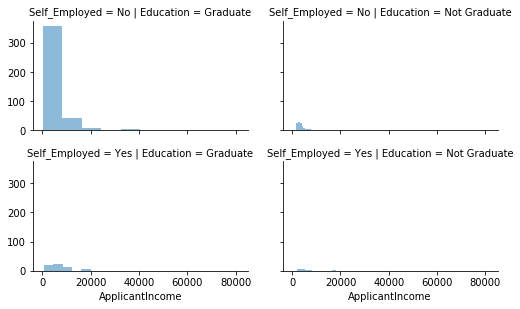

In [100]:
grid = sns.FacetGrid(df_train, row = "Self_Employed",  col = "Education", size = 2.2, aspect=1.6)
grid.map(plt.hist, "ApplicantIncome", alpha = 0.5, bins = 10)
grid.add_legend()

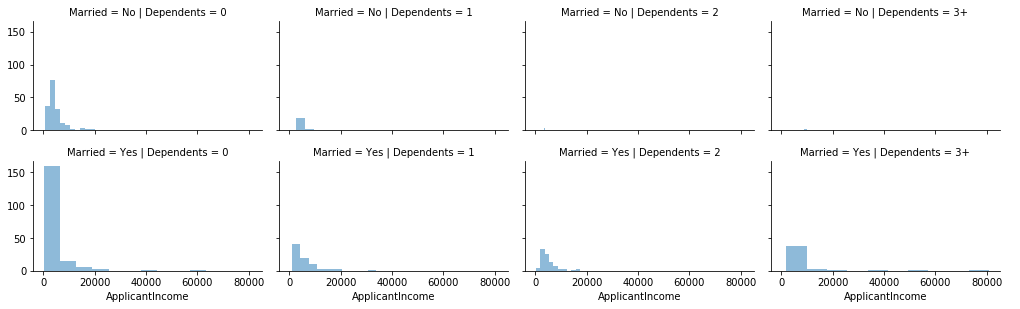

In [101]:
grid = sns.FacetGrid(df_train, row = "Married",  col = "Dependents", size = 2.2, aspect=1.6)
grid.map(plt.hist, "ApplicantIncome", alpha = 0.5, bins = 10)
grid.add_legend()

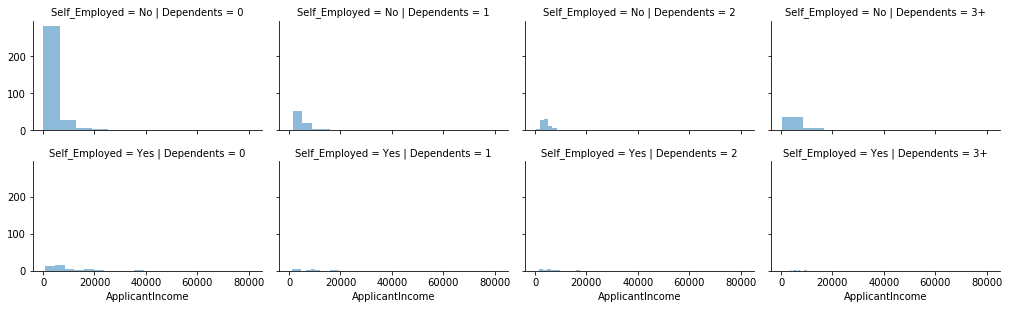

In [102]:
grid = sns.FacetGrid(df_train, row = "Self_Employed",  col = "Dependents", size = 2.2, aspect=1.6)
grid.map(plt.hist, "ApplicantIncome", alpha = 0.5, bins = 10)
grid.add_legend()

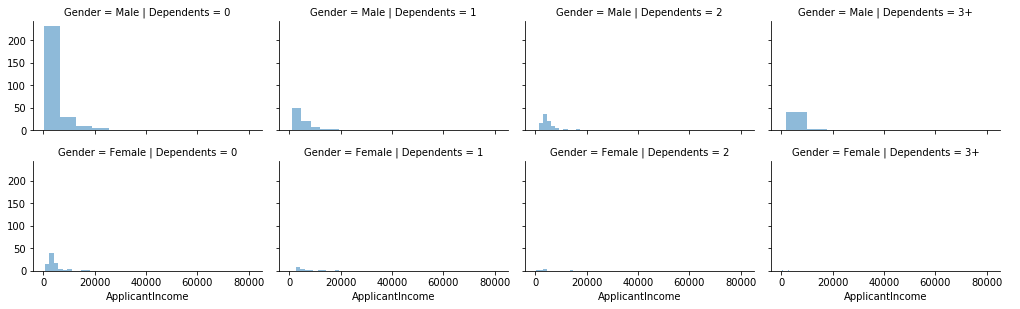

In [103]:
grid = sns.FacetGrid(df_train, row = "Gender",  col = "Dependents", size = 2.2, aspect=1.6)
grid.map(plt.hist, "ApplicantIncome", alpha = 0.5, bins = 10)
grid.add_legend()

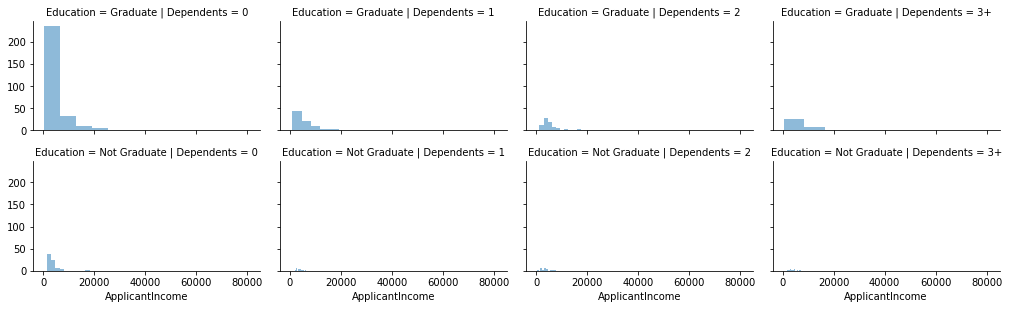

In [104]:
grid = sns.FacetGrid(df_train, row = "Education",  col = "Dependents", size = 2.2, aspect=1.6)
grid.map(plt.hist, "ApplicantIncome", alpha = 0.5, bins = 10)
grid.add_legend()

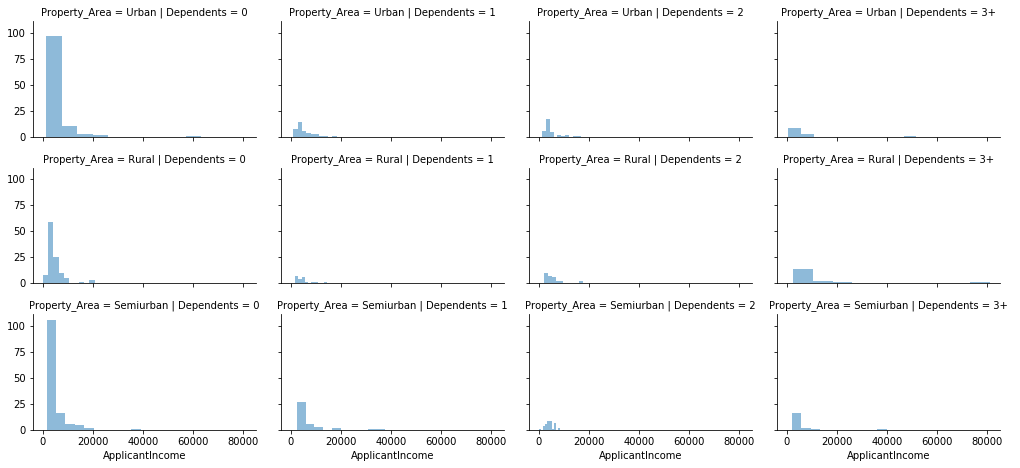

In [105]:
grid = sns.FacetGrid(df_train, row = "Property_Area",  col = "Dependents", size = 2.2, aspect=1.6)
grid.map(plt.hist, "ApplicantIncome", alpha = 0.5, bins = 10)
grid.add_legend()

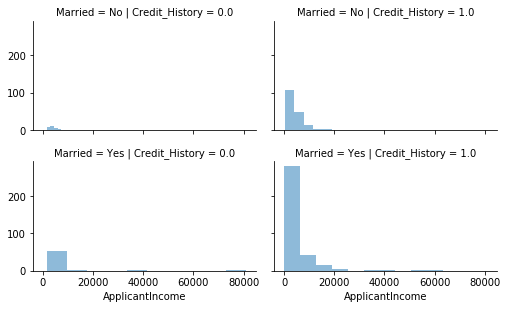

In [106]:
grid = sns.FacetGrid(df_train, row = "Married",  col = "Credit_History", size = 2.2, aspect=1.6)
grid.map(plt.hist, "ApplicantIncome", alpha = 0.5, bins = 10)
grid.add_legend()

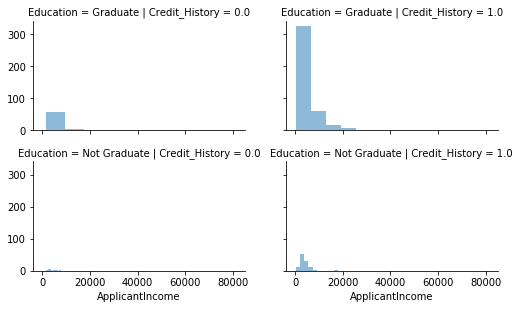

In [107]:
grid = sns.FacetGrid(df_train, row = "Education",  col = "Credit_History", size = 2.2, aspect=1.6)
grid.map(plt.hist, "ApplicantIncome", alpha = 0.5, bins = 10)
grid.add_legend()

### Encoding to numeric data; Getting ready for Training

In [108]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

In [109]:
df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)


In [110]:
df_train.drop('Loan_ID', axis =1, inplace = True)

In [111]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [112]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [113]:
Dependents_  = pd.to_numeric(df_train.Dependents)
Dependents__  = pd.to_numeric(df_test.Dependents)


In [114]:
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

In [115]:

df_train = pd.concat([df_train, Dependents_], axis= 1)
df_test = pd.concat([df_test, Dependents__], axis= 1)

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
Dependents           614 non-null int64
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


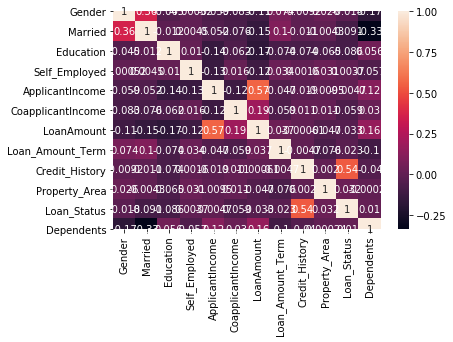

In [117]:
sns.heatmap(df_train.corr(), annot = True)

### Training Model

In [118]:
X = df_train.drop('Loan_Status', axis = 1)
y = df_train['Loan_Status']

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Using Logistic Regression

In [121]:
lr_model = LogisticRegression().fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
evaluation = f1_score(y_test, y_pred)
evaluation

C:\Users\Manish Singh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8979591836734695

### Using Decision Tree

In [122]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
evaluation = f1_score(y_test, y_pred)
evaluation

0.7840909090909092

### Using Random Forest classifier

In [123]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
evaluation = f1_score(y_test, y_pred)
evaluation

C:\Users\Manish Singh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8241758241758242